ANÁLISE DE DADOS - NARGYLLA CLOVIEL {S13 - PROJETO GUIADO III}

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [268]:
df = pd.read_csv("C:\\Users\\nargy\\Documents\\Estudos\\Semana-13\\on26-python-s13-projeto-guiado-II\\material\\Student Mental health.csv")

BREVE HISTÓRIA DOS DADOS:

Dados coletados de alunos da Universidade Islâmica Internacional da Malásia através da plataforma Google Forms em 2020. A pesquisa contou com a participação de 101 alunos de diversas áreas. Tendo em vista que, nesse ano havia 26.000 alunos matrículados, a pesquisa é uma amostra de, aproximadamente, 0,39% de alunos. 

In [269]:
#tipo da df
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [270]:
#memória utilizada
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Do you have Depression?                       101 non-null    object 
 7   Do you have Anxiety?                          101 non-null    object 
 8   Do you have Panic attack?                     101 non-null    object 
 9   Did you seek any specialist for a treatment?  101 non-null    obj

In [271]:
#valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Do you have Depression?                       101 non-null    object 
 7   Do you have Anxiety?                          101 non-null    object 
 8   Do you have Panic attack?                     101 non-null    object 
 9   Did you seek any specialist for a treatment?  101 non-null    obj

In [272]:
#Número de linhas e colunas
df.shape

(101, 10)

<span style="font-size: x-large;">- Analisando os dados</span>

Os dados vão ser analisados e filtrados buscando entender, sobretudo, como se encontra a saúde mental das mulheres nessa Universidade em comparação a saúde mental dos homens

In [273]:
#Qual a quantidade de homens e mulheres que responderam a pesquisa?
df.groupby("Choose your gender").count()

,Timestamp,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
Choose your gender,,,,,,,,,
Female,75,75,75,75,75,75,75,75,75
Male,26,25,26,26,26,26,26,26,26


In [274]:
#qual gênero dos cursos de interesse mais responderam a pesquisa
curso_interesse = df[df["What is your course?"].isin(["Engineering", "Information Technology", "Computer Science"])]
cont_gender = curso_interesse['Choose your gender'].value_counts()
print(cont_gender)


Choose your gender
Female    38
Male      17
Name: count, dtype: int64


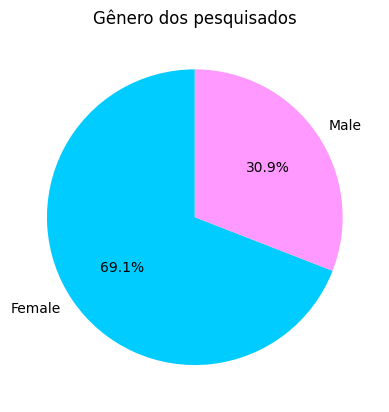

In [275]:
contagem = cont_gender
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, colors=['#00CCFF', '#FF99FF'])
plt.title("Gênero dos pesquisados")
plt.show()

In [276]:
#A média de idade 
media_idade_genero = curso_interesse.groupby('Choose your gender')['Age'].mean()
print(round(media_idade_genero))

Choose your gender
Female    21.0
Male      20.0
Name: Age, dtype: float64


<span style="font-size:large;">*Dados das mulheres*</span>

In [277]:
df_female = df[(df["Choose your gender"] == "Female")]

In [278]:
#filtrando a quantidade de mulheres nos cursos
curso_freq = df_female["What is your course?"].value_counts()
print(curso_freq)

What is your course?
Engineering                               20
Computer Science                          11
Information Technology                     7
Islamic Education                          3
Psychology                                 3
English and Literature                     3
Laws                                       3
KENMS                                      2
Communication                              1
Biomedical science                         1
Human Sciences                             1
Biotechnology                              1
Islamic Jurisprudence                      1
Nursing                                    1
Islamic Education                          1
Malcom                                     1
TESL                                       1
Islamic Jurisprudence                      1
Pharmacy                                   1
Biomedical Science                         1
Econs                                      1
CTS                               

In [279]:
curso_freq_interesse = df_female["What is your course?"].value_counts()
N = 3
top_3_cursos = curso_freq.head(3)
print(top_3_cursos)

What is your course?
Engineering               20
Computer Science          11
Information Technology     7
Name: count, dtype: int64


In [280]:
#Colocando em porcentagem para que a comparação seja efetiva
total_mulheres = 75 #total que respondeu a pesquisa
curso_freq_interesse = df_female["What is your course?"].value_counts()
curso_freq_percent = (curso_freq_interesse / total_mulheres) * 100
top_3_cursos = curso_freq_percent.head(3)
print(round(top_3_cursos))

What is your course?
Engineering               27.0
Computer Science          15.0
Information Technology     9.0
Name: count, dtype: float64


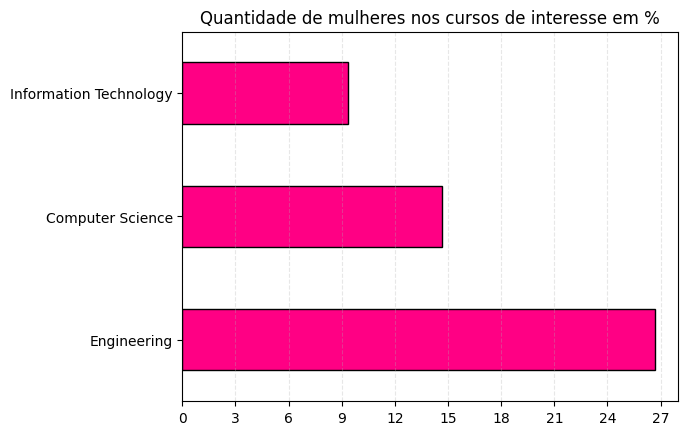

In [281]:
contagem_course = top_3_cursos
contagem_course.plot(kind= "barh", edgecolor="black", color="#ff0084")
plt.xlabel("")
plt.ylabel("")
plt.xticks(np.arange(0, 30, 3))
plt.title("Quantidade de mulheres nos cursos de interesse em %")
plt.grid(axis= 'x', linestyle = '--', alpha = 0.3)
plt.show()

In [282]:
#A saúde mental das mulheres nesses cursos

palavras_filtro = ["Engineering", "Computer Science", "Information Technology"]

df_filter_course = df_female[df_female['What is your course?'].isin(palavras_filtro)]

Número de alunas dos top 3 cursos com depressão:

In [283]:
total_mulheres_curso = 38
depression = df_filter_course["Do you have Depression?"].value_counts()

mulheres_depressao = depression.get("Yes", 0)
mulheres_sem_depressao = depression.get("No", 0)
percent_sim = (mulheres_depressao / total_mulheres_curso) * 100
percent_nao = (mulheres_sem_depressao / total_mulheres_curso) * 100

print(f"Sim: {percent_sim:.1f}%")
print(f"Não: {percent_nao:.1f}%")


Sim: 36.8%
Não: 63.2%


Número de alunas dos top 3 cursos com ansiedade:

In [284]:
anxiety = df_filter_course["Do you have Anxiety?"].value_counts()

mulheres_ansiedade = anxiety.get("Yes", 0)
mulheres_sem_ansiedade = anxiety.get("No", 0)
percent_anxie_sim = (mulheres_ansiedade / total_mulheres_curso) * 100
percent_anxie_nao = (mulheres_sem_ansiedade/ total_mulheres_curso) * 100

print(f"Sim: {percent_anxie_sim:.1f}%")
print(f"Não: {percent_anxie_nao:.1f}%")

Sim: 36.8%
Não: 63.2%


Número de alunas dos top 3 cursos com ataque de pânico:

In [285]:
panic = df_filter_course["Do you have Panic attack?"].value_counts()

mulheres_panico = panic.get("Yes", 0)
mulheres_sem_panico = panic.get("No", 0)
percent_panic_sim = (mulheres_panico/ total_mulheres_curso) * 100
percent_panic_nao = (mulheres_sem_panico/ total_mulheres_curso) * 100

print(f"Sim: {percent_panic_sim:.1f}%")
print(f"Não: {percent_panic_nao:.1f}%")


Sim: 34.2%
Não: 65.8%


Número de alunas dos top 3 cursos que fazem tratamento:

In [286]:
treatment = df_filter_course["Did you seek any specialist for a treatment?"].value_counts()

mulheres_trat = treatment.get("Yes", 0)
mulheres_sem_trat = treatment.get("No", 0)
percent_treat_sim = (mulheres_trat/ total_mulheres_curso) * 100
percent_treat_nao = (mulheres_sem_trat/ total_mulheres_curso) * 100

print(f"Sim: {percent_treat_sim:.2f}%")
print(f"Não: {percent_treat_nao:.2f}%")

Sim: 7.89%
Não: 92.11%


In [287]:
treatment_contagem = percent_treat_sim
treatment_contagem_nao = percent_treat_nao

anxiety_contagem = percent_anxie_sim
anxiety_contagem_nao = percent_anxie_nao

depression_contagem = percent_sim
depression_contagem_nao = percent_nao

panic_attack_contagem = percent_panic_sim
panic_attack_contagem_nao = percent_panic_nao

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Dados homens

In [288]:
df_male = df[(df["Choose your gender"] == "Male")]
#filtrando a quantidade de homens nos cursos
curso_freq_male = df_male["What is your course?"].value_counts()
print(curso_freq_male)

What is your course?
Computer Science          7
Engineering               6
Information Technology    4
KIRKHS                    2
Islamic Education         1
Mathemathics              1
TAASL                     1
Communication             1
Biomedical science        1
Radiography               1
Biomedical Science        1
Name: count, dtype: int64


In [289]:
curso_freq_inter_male = df_male["What is your course?"].value_counts()
N = 3
top_3_cursos = curso_freq_male.head(3)
print(top_3_cursos)

What is your course?
Computer Science          7
Engineering               6
Information Technology    4
Name: count, dtype: int64


In [290]:
total_homens = 26
curso_freq_inter_male = df_male["What is your course?"].value_counts()
curso_freq_male_percent = (curso_freq_inter_male/ total_homens) * 100
top_3_cursos_male = curso_freq_male_percent.head(3)
print(round(top_3_cursos_male))

What is your course?
Computer Science          27.0
Engineering               23.0
Information Technology    15.0
Name: count, dtype: float64


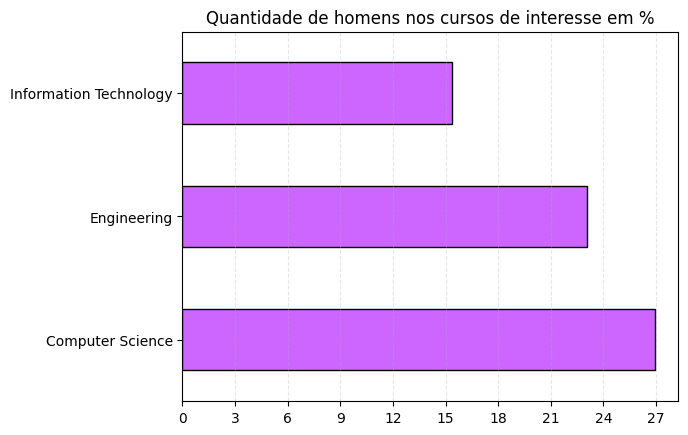

In [291]:
contagem_course_male = top_3_cursos_male
contagem_course_male.plot(kind= "barh", edgecolor="black", color="#cc66ff")
plt.xlabel("")
plt.ylabel("")
plt.xticks(np.arange(0, 30, 3))
plt.title("Quantidade de homens nos cursos de interesse em %")
plt.grid(axis= 'x', linestyle = '--', alpha = 0.3)
plt.show()


In [292]:
palavras_filtro_male = ["Engineering", "Computer Science", "Information Technology"]

df_filter_course_male = df_male[df_male['What is your course?'].isin(palavras_filtro)]

In [293]:
#NÚMERO DE ALUNOS DOS TOP 3 CURSOS COM DEPRESSÃO:

total_homens_curso = 17 
depression_male = df_filter_course_male["Do you have Depression?"].value_counts()

homens_depressao = depression_male.get("Yes", 0)
homens_sem_depressao = depression_male.get("No", 0)
percent_male_sim = (homens_depressao / total_homens_curso) * 100
percent_male_nao = (homens_sem_depressao/ total_homens_curso) * 100

print(f"Sim: {percent_male_sim:.1f}%")
print(f"Não: {percent_male_nao:.1f}%")

Sim: 29.4%
Não: 70.6%


In [294]:
#NÚMERO DE ALUNOS DOS TOP 3 CURSOS COM ANSIEDADE:

anxiety_male = df_filter_course_male["Do you have Anxiety?"].value_counts()

homens_ansiedade = anxiety_male.get("Yes", 0)
homens_sem_ansiedade = anxiety_male.get("No", 0)
percent_anxie_male_sim = (homens_ansiedade / total_homens_curso) * 100
percent_anxie_male_nao = (homens_sem_ansiedade/ total_homens_curso) * 100

print(f"Sim: {percent_anxie_male_sim:.1f}%")
print(f"Não: {percent_anxie_male_nao:.1f}%")



Sim: 47.1%
Não: 52.9%


In [295]:
#NÚMERO DE ALUNOS DO TOP 3 CURSOS COM ATAQUE DE PÂNICO:
panic_male = df_filter_course_male["Do you have Panic attack?"].value_counts()

homens_panico = panic_male.get("Yes", 0)
homens_sem_panico = panic_male.get("No", 0)
percent_panic_male_sim = (homens_panico/ total_homens_curso) * 100
percent_panic_male_nao = (homens_sem_panico/ total_homens_curso) * 100

print(f"Sim: {percent_panic_male_sim:.1f}%")
print(f"Não: {percent_panic_male_nao:.1f}%")

Sim: 29.4%
Não: 70.6%


In [296]:
#NÚMERO DE ALUNOS DO TOP 3 CURSOS QUE FAZEM TRATAMENTO
treatment_male = df_filter_course_male["Did you seek any specialist for a treatment?"].value_counts()

homens_trat = treatment_male.get("Yes", 0)
homens_sem_trat = treatment_male.get("No", 0)
percent_treat_male_sim = (homens_trat/ total_homens_curso) * 100
percent_treat_male_nao = (homens_sem_trat/ total_homens_curso) * 100

print(f"Sim: {percent_treat_male_sim:.2f}%")
print(f"Não: {percent_treat_male_nao:.2f}%")

Sim: 5.88%
Não: 94.12%


In [297]:
treatment_contagem_male = percent_treat_male_sim
anxiety_contagem_male = percent_anxie_male_sim
depression_contagem_male = percent_male_sim
panic_attack_contagem_male = percent_panic_male_sim

treatment_contagem_male_nao = percent_treat_male_nao
anxiety_contagem_male_nao = percent_anxie_male_nao
depression_contagem_male_nao = percent_male_nao
panic_attack_contagem_male_nao = percent_panic_male_nao

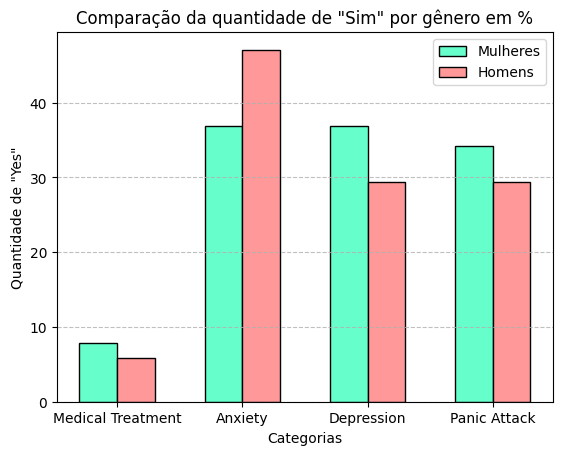

In [298]:
categorias = ['Medical Treatment', 'Anxiety', 'Depression', 'Panic Attack']
mulheres = [treatment_contagem, anxiety_contagem, depression_contagem, panic_attack_contagem]
homens = [treatment_contagem_male, anxiety_contagem_male, depression_contagem_male, panic_attack_contagem_male]
largura_barra = 0.3
posicoes = np.arange(len(categorias))

plt.bar(posicoes - largura_barra/2, mulheres, largura_barra, label='Mulheres', color='#66ffcc', edgecolor = "black")
plt.bar(posicoes + largura_barra/2, homens, largura_barra, label='Homens', color='#FF9999', edgecolor = 'black')
plt.xlabel('Categorias')
plt.ylabel('Quantidade de "Yes"')
plt.title('Comparação da quantidade de "Sim" por gênero em %')
plt.legend()
plt.xticks(posicoes, categorias)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()


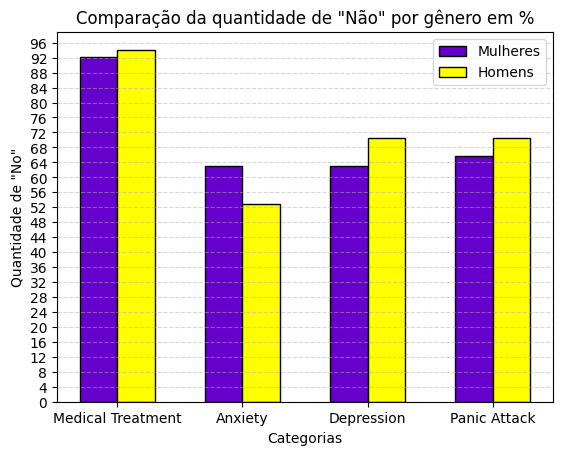

In [299]:
categorias_nao = ['Medical Treatment', 'Anxiety', 'Depression', 'Panic Attack']
mulheres_nao = [treatment_contagem_nao, anxiety_contagem_nao, depression_contagem_nao, panic_attack_contagem_nao]
homens_nao = [treatment_contagem_male_nao, anxiety_contagem_male_nao, depression_contagem_male_nao, panic_attack_contagem_male_nao]
largura_barra = 0.3
posicoes = np.arange(len(categorias_nao))

plt.bar(posicoes - largura_barra/2, mulheres_nao, largura_barra, label='Mulheres', color='#6600CC', edgecolor = "black")
plt.bar(posicoes + largura_barra/2, homens_nao, largura_barra, label='Homens', color='#FFFF00', edgecolor = 'black')
plt.xlabel('Categorias')
plt.ylabel('Quantidade de "No"')
plt.title('Comparação da quantidade de "Não" por gênero em %')
plt.legend()
plt.xticks(posicoes, categorias_nao)
plt.yticks(np.arange(0, 100, 4))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**ANALISANDO O DESEMPENHO ACADEMICO DESSAS CATEGORIAS DENTRO DOS CURSOS**

In [300]:
#Desempenho academico mulheres
df_CGPA_female = df_filter_course["What is your CGPA?"].value_counts()
percent = (df_CGPA_female/total_mulheres_curso)*100
print(round(percent))

What is your CGPA?
3.50 - 4.00    55.0
3.00 - 3.49    37.0
2.50 - 2.99     5.0
2.00 - 2.49     3.0
Name: count, dtype: float64


In [301]:
#Desempenho academico homens
df_CGPA_male = df_filter_course_male["What is your CGPA?"].value_counts()
percent_male = (df_CGPA_male/total_homens_curso)*100
print(round(percent))

What is your CGPA?
3.50 - 4.00    55.0
3.00 - 3.49    37.0
2.50 - 2.99     5.0
2.00 - 2.49     3.0
Name: count, dtype: float64


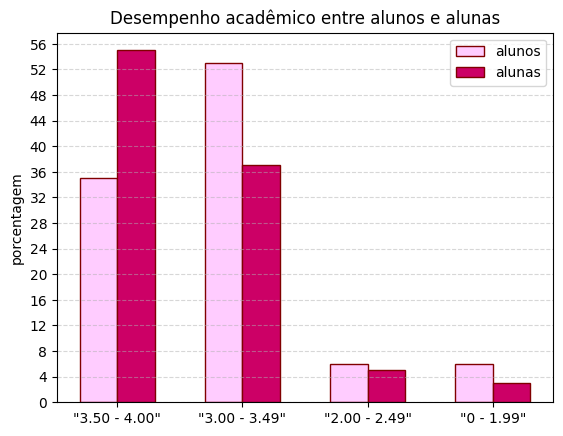

In [302]:
#VISUALIZAÇÃO GRÁFICA
#(eu sei que esse não é o método ideal, já que com dataset com informações maiores
# eu não conseguiria usar, mas eu não consegui ajustar de como melhor)

cat_CGPA = ['"3.50 - 4.00"','"3.00 - 3.49"','"2.00 - 2.49"','"0 - 1.99"']
male_cgpa = [35.0, 53.0, 6.0, 6.0]
female_cgpa = [55.0, 37.0, 5.0, 3.0]
largura_barra_cgpa = 0.35
posicoes = np.arange(len(cat_CGPA))

plt.bar(posicoes - largura_barra/2, male_cgpa, largura_barra, label='alunos', color='#ffccff', edgecolor = 'maroon')
plt.bar(posicoes + largura_barra/2, female_cgpa, largura_barra, label='alunas', color='#cc0066', edgecolor = 'maroon')
plt.xlabel('')
plt.ylabel('porcentagem')
plt.title('Desempenho acadêmico entre alunos e alunas')
plt.xticks(posicoes, cat_CGPA)
plt.legend()
plt.yticks(np.arange(0, 60, 4))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


INSIGHTS

Pode-se notar que, de acordo com os dados levantados na pesquisa, os alunos possuem mais problemas na saúde mental do que as alunas, contudo, as alunas ainda são as que mais buscam ajuda para realizar o tratamento. Ainda que não seja possível avaliar com certeza, há uma possibilidade desse fato impactar no desempenho academico de todos os estudantes, uma vez que a maioria das alunas possuem um CGPA com nota excelente (3.50-4.00) em comparação aos alunos.